In [18]:
# load dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

In [2]:
# read in data
raw_data = pd.read_csv("data.csv")

In [3]:
# data inspection
raw_data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
# remove NaN column
raw_data = raw_data.iloc[:,:-1]

In [5]:
# check data
raw_data.shape

(569, 32)

/Users/congchen/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


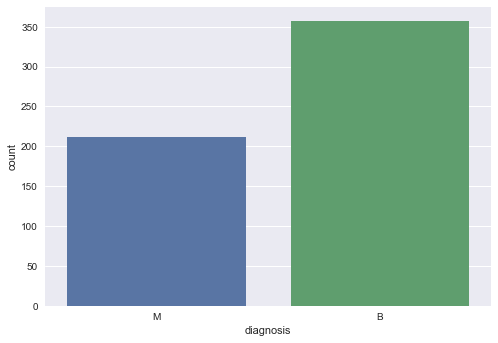

In [8]:
# plot diagnosis
sns.countplot(raw_data['diagnosis'],label="Count")
plt.show()

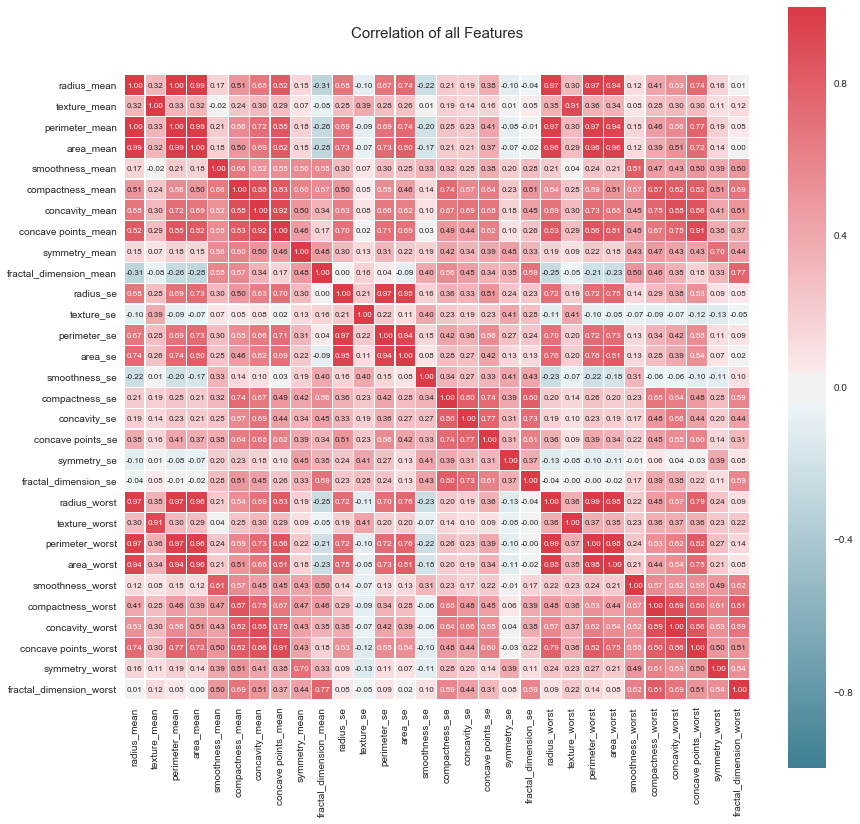

In [9]:
# check correlation of features and plot
corr = raw_data.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of all Features', y=1.05, size=15)
plt.show()

In [10]:
# change 'diagnosis' column values to 1 or 0
raw_data['diagnosis'] = raw_data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

In [11]:
# change 'id' column to index
raw_data = raw_data.set_index('id')

In [13]:
# inspect the final data frame
# raw_data.head()
raw_data.shape

(569, 31)

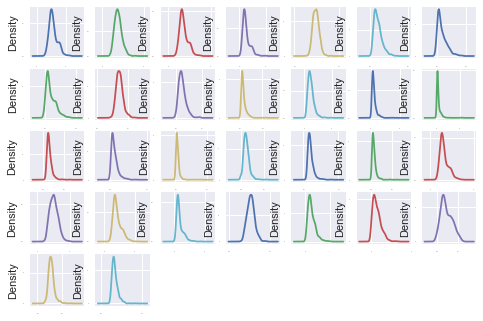

In [14]:
# generate density plot for features
raw_data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

In [16]:
# assign X, y data set and split to training and testing data sets
y = raw_data['diagnosis'].values
X = raw_data.drop('diagnosis', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [19]:
# generate model list to be tested
models_list = []
models_list.append(('DT', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('RF', RandomForestClassifier()))

In [20]:
# evaluate models performance
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

DT: 0.909615 (0.037270) (run time: 0.061523)
SVM: 0.625769 (0.074918) (run time: 0.085717)
NB: 0.937115 (0.025816) (run time: 0.013100)
KNN: 0.901859 (0.044437) (run time: 0.022216)
RF: 0.949615 (0.019870) (run time: 0.154993)


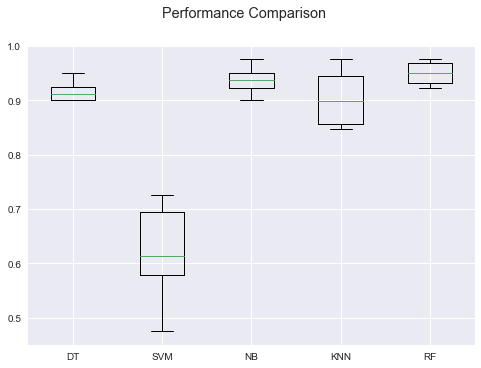

In [21]:
# plot the results
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
# using Pipeline and evaluate models again using scaled data

import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', 
                                                                       RandomForestClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledDT: 0.927244 (0.028195) (run time: 0.063515)
ScaledSVM: 0.969808 (0.018832) (run time: 0.042754)
ScaledNB: 0.929615 (0.024717) (run time: 0.017775)
ScaledKNN: 0.962179 (0.025967) (run time: 0.026183)
ScaledRF: 0.959679 (0.023269) (run time: 0.156581)


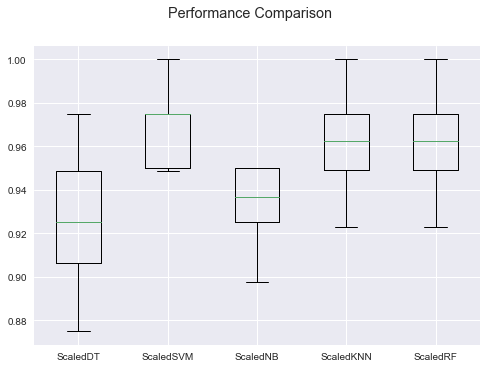

In [24]:
# plot the results
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
# Algorithm Tuning - Tuning SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.974874 using {'C': 2.0, 'kernel': 'rbf'}
0.967337 (0.016132) with: {'C': 0.1, 'kernel': 'linear'}
0.836683 (0.042105) with: {'C': 0.1, 'kernel': 'poly'}
0.939698 (0.023446) with: {'C': 0.1, 'kernel': 'rbf'}
0.942211 (0.022650) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.969849 (0.024628) with: {'C': 0.3, 'kernel': 'linear'}
0.871859 (0.039569) with: {'C': 0.3, 'kernel': 'poly'}
0.957286 (0.022993) with: {'C': 0.3, 'kernel': 'rbf'}
0.954774 (0.015126) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.969849 (0.021819) with: {'C': 0.5, 'kernel': 'linear'}
0.889447 (0.039437) with: {'C': 0.5, 'kernel': 'poly'}
0.964824 (0.020415) with: {'C': 0.5, 'kernel': 'rbf'}
0.952261 (0.017586) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.967337 (0.027764) with: {'C': 0.7, 'kernel': 'linear'}
0.896985 (0.038329) with: {'C': 0.7, 'kernel': 'poly'}
0.972362 (0.017664) with: {'C': 0.7, 'kernel': 'rbf'}
0.944724 (0.022233) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.964824 (0.032424) with: {'C': 0.9, 'kernel': 'linear'

In [27]:
# Apply model to test data

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

Run Time: 0.003331
Accuracy score 0.982456
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       108
          1       0.98      0.97      0.98        63

avg / total       0.98      0.98      0.98       171

[[107   1]
 [  2  61]]


In [30]:
# Algorithm Tuning - Tuning decision tree
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
min_samples_split = [2, 5, 10, 20, 30, 40]
min_samples_leaf = [1, 2, 4]
criterion = ['gini', 'entropy']
max_features = [5, 10, 20, 30]
param_grid = dict(
    min_samples_split=min_samples_split,
    criterion=criterion,
    min_samples_leaf=min_samples_leaf,
    max_features = max_features
)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.957286 using {'criterion': 'gini', 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.904523 (0.039933) with: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.937186 (0.039388) with: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.939698 (0.025613) with: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.934673 (0.025551) with: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.907035 (0.038870) with: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 30}
0.914573 (0.040788) with: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 40}
0.922111 (0.038205) with: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.919598 (0.040059) with: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 2

In [31]:
# Apply model to test data

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = DecisionTreeClassifier(criterion='gini', max_features=20, min_samples_leaf=2,
                               min_samples_split=2)
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

Run Time: 0.004017
Accuracy score 0.929825
             precision    recall  f1-score   support

          0       0.94      0.94      0.94       108
          1       0.90      0.90      0.90        63

avg / total       0.93      0.93      0.93       171

[[102   6]
 [  6  57]]


In [33]:
# Algorithm Tuning - Tuning Random forest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# Number of trees in random forest
n_estimators = [10, 50, 100, 200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 30, 50, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid = dict(
   n_estimators=n_estimators,
   max_features=max_features,
   max_depth=max_depth,
   min_samples_split=min_samples_split,
   min_samples_leaf=min_samples_leaf,
   bootstrap=bootstrap
)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967337 using {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}
0.947236 (0.038104) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.944724 (0.024834) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.954774 (0.027072) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.962312 (0.025825) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.944724 (0.015225) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
0.944724 (0.027305) with: {'bootstrap': True, 'max_depth': 10, 'max_features':

In [34]:
# Apply model to test data

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=4,
                               min_samples_split=5)
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

Run Time: 0.017701
Accuracy score 0.970760
             precision    recall  f1-score   support

          0       0.98      0.97      0.98       108
          1       0.95      0.97      0.96        63

avg / total       0.97      0.97      0.97       171

[[105   3]
 [  2  61]]


In [35]:
# Algorithm Tuning - Tuning Naive Bayes
# not hyperparameter to grid

# Apply model to test data
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = GaussianNB()
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

Run Time: 0.001250
Accuracy score 0.935673
             precision    recall  f1-score   support

          0       0.94      0.95      0.95       108
          1       0.92      0.90      0.91        63

avg / total       0.94      0.94      0.94       171

[[103   5]
 [  6  57]]


In [36]:
# Algorithm Tuning - Tuning KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_neighbors = [5,6,7,8,9,10]
leaf_size = [1,2,3,5]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree','kd_tree','brute']
n_jobs = [-1]
param_grid = dict(
   n_neighbors=n_neighbors,
   leaf_size=leaf_size,
   weights=weights,
   algorithm=algorithm,
   n_jobs=n_jobs
)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.964824 using {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'distance'}
0.962312 (0.025950) with: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}
0.962312 (0.025950) with: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}
0.962312 (0.025794) with: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'uniform'}
0.962312 (0.025856) with: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'}
0.954774 (0.033338) with: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'uniform'}
0.954774 (0.033338) with: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
0.957286 (0.029958) with: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'uniform'}
0.964824 (0.023011) with: {'algorithm': 'auto', 'leaf_siz

In [37]:
# Apply model to test data
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_jobs=-1,
                               n_neighbors=8, weights='uniform')
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

Run Time: 0.001300
Accuracy score 0.959064
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       108
          1       0.97      0.92      0.94        63

avg / total       0.96      0.96      0.96       171

[[106   2]
 [  5  58]]
